In [1]:
!nvidia-smi

Wed May 24 09:14:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os 
home =os.getcwd()
print(home)

/content


In [3]:
!pip install ultralytics

from IPython import display
display.clear_output()
!yolo mode=checks  

WARNING ⚠️ 'yolo mode=checks' is deprecated. Use 'yolo checks' instead.
Ultralytics YOLOv8.0.107 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [4]:
from ultralytics.yolo.engine.model import YOLO
from ultralytics import yolo
from IPython.display import display,Image

In [5]:
%cd {home}
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4B3GtRSO1xc7X5CGZWIp")
project = rf.workspace("cv-project-j10ka").project("egyptian-heiroglyphics")
dataset = project.version(2).download("yolov8")

/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.6 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=b2f074cb24d0ce47137d85a1f8a9a1f798ccf7df8d90268754fad1a83c4601be
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.107, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to egyptian-heiroglyphics-2 in yolov8:: 100%|██████████| 7792/7792 [00:01<00:00, 5116.27it/s]


In [6]:
%cd {home}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/egyptian-heiroglyphics-2/train/images/100-1-_jpg.rf.49980299b8c88f71ceded2c7ae0192de.jpg'

/content
100% 6.23M/6.23M [00:00<00:00, 81.1MB/s]
Ultralytics YOLOv8.0.107 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

image 1/1 /content/egyptian-heiroglyphics-2/train/images/100-1-_jpg.rf.49980299b8c88f71ceded2c7ae0192de.jpg: 640x640 1 kite, 7.9ms
Speed: 6.0ms preprocess, 7.9ms inference, 20.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


/content


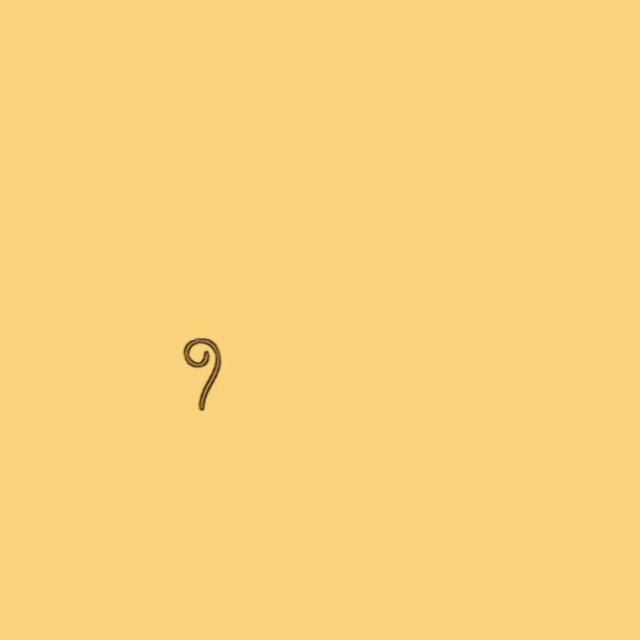

In [7]:
%cd {home}
Image(filename='/content/egyptian-heiroglyphics-2/train/images/100-1-_jpg.rf.49980299b8c88f71ceded2c7ae0192de.jpg',height=600)

In [8]:
model=YOLO(f'{home}/yolov8n.pt')
result=model.predict(source='/content/egyptian-heiroglyphics-2/train/images/100-1-_jpg.rf.49980299b8c88f71ceded2c7ae0192de.jpg', conf=0.25)


image 1/1 /content/egyptian-heiroglyphics-2/train/images/100-1-_jpg.rf.49980299b8c88f71ceded2c7ae0192de.jpg: 640x640 1 kite, 9.1ms
Speed: 2.3ms preprocess, 9.1ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)


In [9]:
!cd {home}
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=40 imgsz=640

Ultralytics YOLOv8.0.107 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/egyptian-heiroglyphics-2/data.yaml, epochs=40, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simp

In [ ]:
!ls {home}/runs/detect/train

args.yaml					     results.png
confusion_matrix_normalized.png			     train_batch0.jpg
confusion_matrix.png				     train_batch1.jpg
events.out.tfevents.1684574537.78d1a8f16cb9.29060.0  train_batch2.jpg
F1_curve.png					     val_batch0_labels.jpg
labels_correlogram.jpg				     val_batch0_pred.jpg
labels.jpg					     val_batch1_labels.jpg
P_curve.png					     val_batch1_pred.jpg
PR_curve.png					     val_batch2_labels.jpg
R_curve.png					     val_batch2_pred.jpg
results.csv					     weights


/content


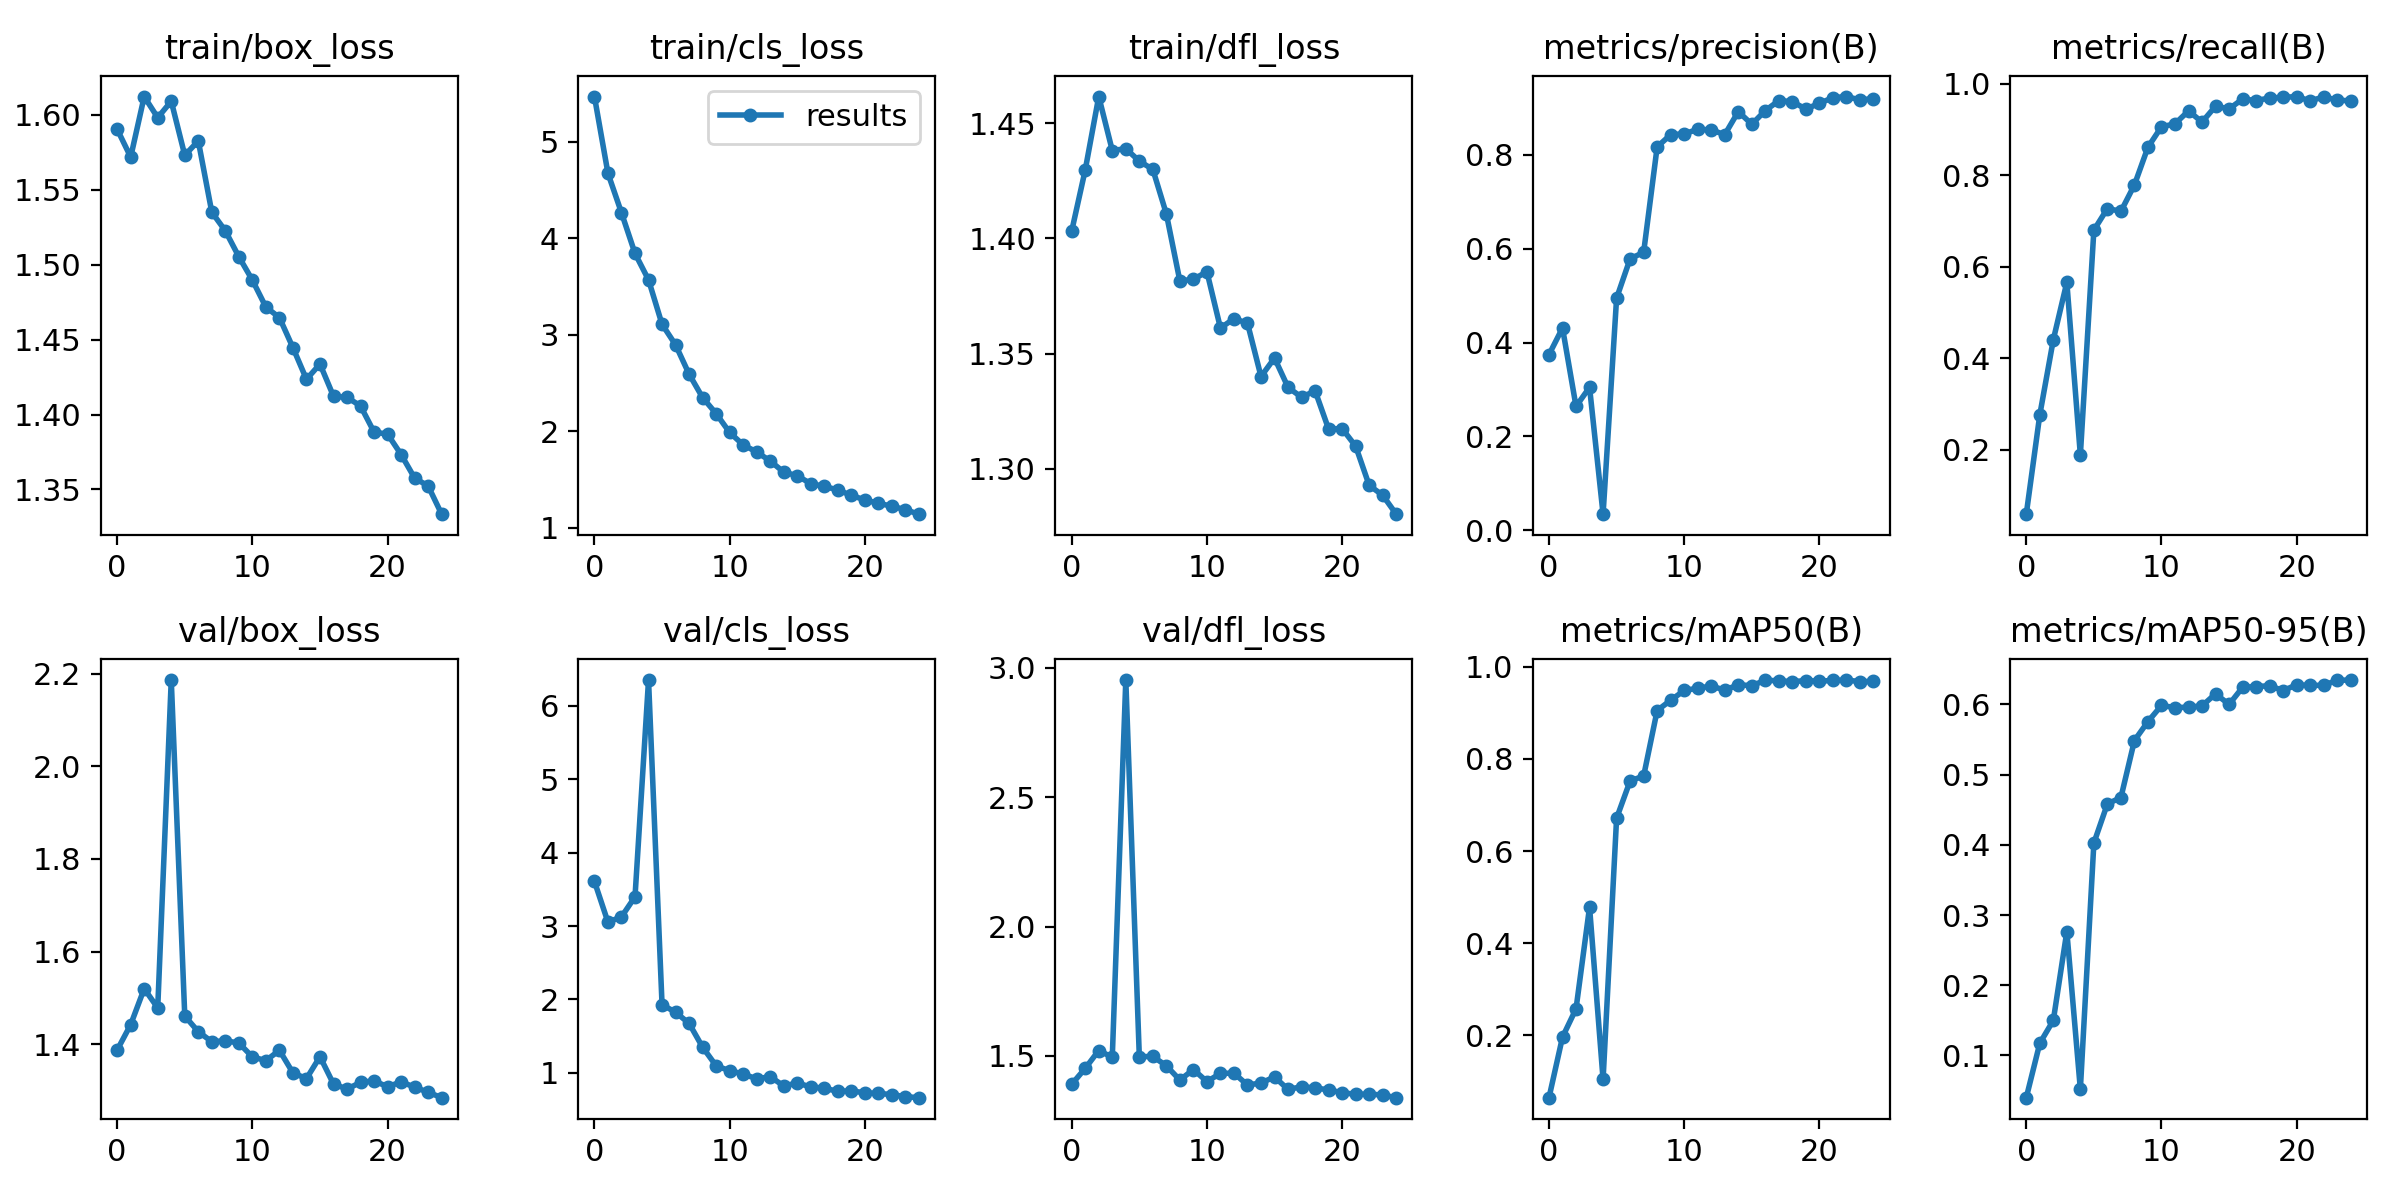

In [ ]:
%cd {home}
Image(filename=f'{home}/runs/detect/train/results.png',width=600)

In [ ]:
%cd {home}
!yolo task=detect mode=val model={home}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3291269 parameters, 0 gradients
val: Scanning /content/egyptian-heiroglyphics-2/valid/labels.cache... 778 images, 0 backgrounds, 0 corrupt: 100% 778/778 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 49/49 [00:12<00:00,  3.89it/s]
                   all        778        778      0.919      0.963      0.968      0.636
                   100        778          7      0.943          1      0.995      0.762
                 Among        778          9      0.955          1      0.995      0.758
                 Angry        778         14      0.973          1      0.995      0.833
                  Ankh        778          7      0.948          1      0.995      0.614
                Aroura        778          7      0.968      0.857      0.925      0.649
                    At        778     

In [ ]:
%cd {home}
!yolo task=detect mode=predict model={home}/runs/detect/train/weights/best.pt conf=0.5 source=/content/202104060433263326.jpg

/content
Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3291269 parameters, 0 gradients

image 1/1 /content/202104060433263326.jpg: 416x640 (no detections), 106.6ms
Speed: 6.6ms preprocess, 106.6ms inference, 33.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5


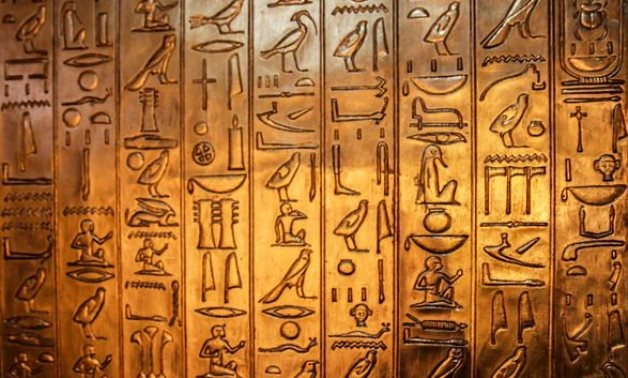

In [ ]:
import glob
from IPython.display import Image,display
for image_path in glob.glob(f'{home}/runs/detect/predict5/202104060433263326.jpg')[:1]:
  display(Image(filename=image_path,width=640))
  print("\n")